In [1]:
#Conecção ao API + Imports Necessarios

In [2]:
import pystac_client

In [3]:
from wtss import *

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt

In [5]:
import rasterio
from rasterio.crs import CRS
from rasterio.warp import transform
from rasterio.windows import from_bounds

def read(uri: str, bbox: list, masked: bool = True, crs: str = None):
    """Read raster window as numpy.ma.masked_array."""
    source_crs = CRS.from_string('EPSG:4326')
    if crs:
        source_crs = CRS.from_string(crs)

    # Expects the bounding box has 4 values
    w, s, e, n = bbox
        
    with rasterio.open(uri) as dataset:
        transformer = transform(source_crs, dataset.crs, [w, e], [s, n])
        window = from_bounds(transformer[0][0], transformer[1][0], 
                             transformer[0][1], transformer[1][1], dataset.transform)
        return dataset.read(1, window=window, masked=masked)
    
#preparação para a leitura e demonstração dos arrays correpondentes a banda X 

In [6]:
parameters = dict(access_token='r5p7J7kpqIbnPY47jX4i8YfaVcKq7iPFsO3nQQ6OpF') #Colocar Token aqui
service_STAC = pystac_client.Client.open('https://brazildatacube.dpi.inpe.br/stac/', parameters=parameters)

In [7]:
service_WTSS = WTSS('https://brazildatacube.dpi.inpe.br/', 
               access_token='r5p7J7kpqIbnPY47jX4i8YfaVcKq7iPFsO3nQQ6OpF') #Colocar Token aqui

In [8]:
#Obtenção e Geração de dados

In [9]:
service_STAC.get_collection('S2-16D-2').get_items() 

<generator object CollectionClient.get_items at 0x7f4b72be3990>

In [10]:
bbox=(-51.0000,-12.4000,-50.8000,-12.1700)

item_search = service_STAC.search(bbox=bbox,
                             datetime='2021-05-01/2021-09-30',
                             collections=['S2-16D-2'])

item_search.matched() #numero de ficheiros de informação disponiveis com estas defenições

#bbox = dimensoes do quadrado de pesquisa a obter em conjunto com o mapa do BDC
#datetime = linha temporal pertendida a obter os ficheiros de informação
#collections= satelite que ira fornecer a informação

11

In [11]:
for item in item_search.get_items():    #listagem de ficheiros de informação disponiveis 
    print(item)

<Item id=S2-16D_V2_025018_20210930>
<Item id=S2-16D_V2_025018_20210914>
<Item id=S2-16D_V2_025018_20210829>
<Item id=S2-16D_V2_025018_20210813>
<Item id=S2-16D_V2_025018_20210728>
<Item id=S2-16D_V2_025018_20210712>
<Item id=S2-16D_V2_025018_20210626>
<Item id=S2-16D_V2_025018_20210610>
<Item id=S2-16D_V2_025018_20210525>
<Item id=S2-16D_V2_025018_20210509>
<Item id=S2-16D_V2_025018_20210423>


In [22]:
items = list(item_search.get_items()) #Listagem dos items num array com o nome items

In [12]:
#Calculo do Ndvi

In [13]:
red = read(item.assets['B04'].href, bbox=bbox)         
nir = read(item.assets['B08'].href, bbox=bbox)

In [14]:
ndvi = (nir - red)/(nir + red)
ndvi

masked_array(
  data=[[0.6030534351145038, 0.5963396034570412, 0.6320845341018252, ...,
         0.6588183029764549, 0.6458333333333334, 0.6434707903780069],
        [0.5768208399787347, 0.5850025680534156, 0.5965447154471545, ...,
         0.6265709156193896, 0.6312800349497597, 0.6516902011125374],
        [0.5639503507825149, 0.5804627249357327, 0.6045816733067729, ...,
         0.6244424620874219, 0.6278659611992945, 0.6448438168592212],
        ...,
        [0.6135593220338983, 0.6429240862230553, 0.669877408056042, ...,
         0.506124448799608, 0.5150925024342746, 0.4892048446550816],
        [0.6363636363636364, 0.6854575163398693, 0.6991838321026039, ...,
         0.5234412759787337, 0.5203171456888008, 0.4874532835024026],
        [0.6763550667714061, 0.7068103116583301, 0.7398932112890922, ...,
         0.5390587093643863, 0.5013068478829065, 0.48698884758364314]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, Fal

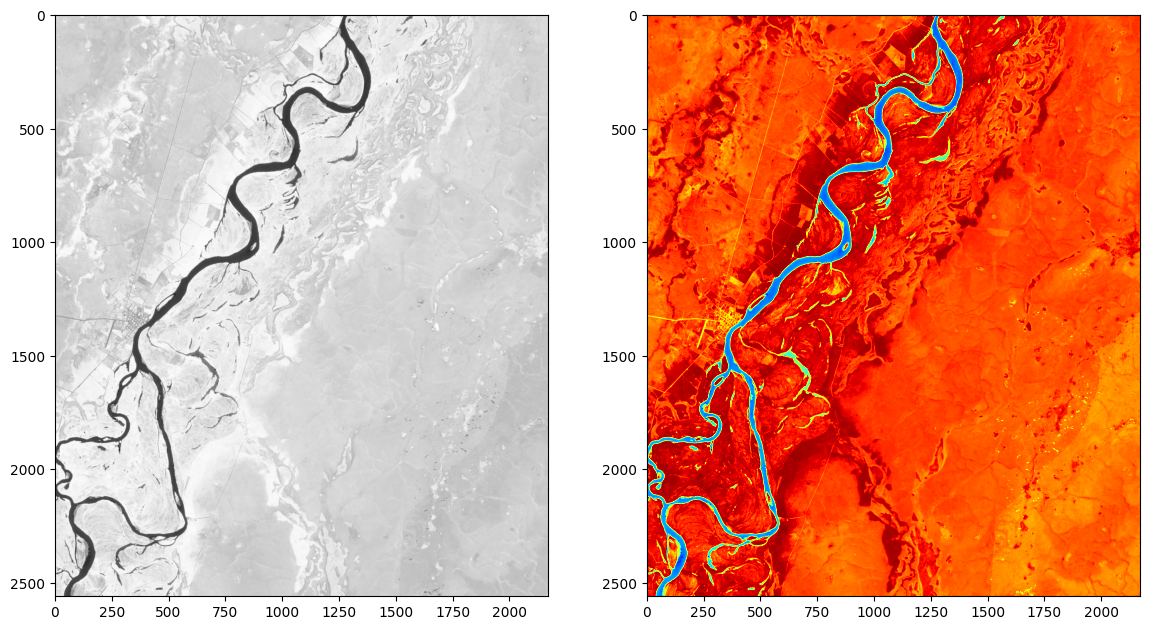

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14, 14)) #Plot do Ndvi em gray e jet

ax1.imshow(ndvi, cmap='gray')
ax2.imshow(ndvi, cmap='jet')

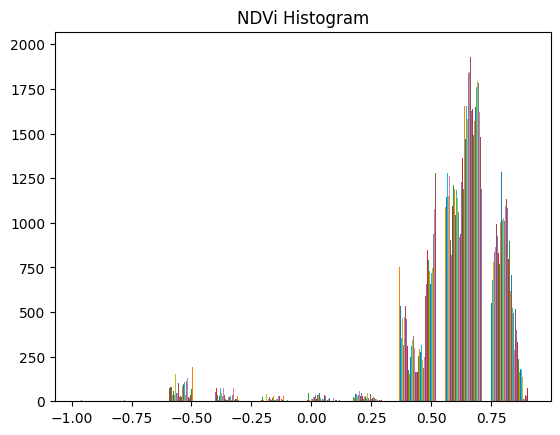

In [16]:
plt.title("NDVi Histogram") #Ciração do histograma do ndvi
plt.hist(ndvi)
plt.show()

In [17]:
labeled_img = ndvi.copy() #copia do array calculado do ndvi

In [18]:
labeled_img[ndvi < 0.2] = 1 # < 0.2
labeled_img[ndvi >= 0.2] = 3 # 0.2 - 0.45
labeled_img[ndvi >= 0.45] = 2 # >= 0.45
labeled_img

masked_array(
  data=[[2.0, 2.0, 2.0, ..., 2.0, 2.0, 2.0],
        [2.0, 2.0, 2.0, ..., 2.0, 2.0, 2.0],
        [2.0, 2.0, 2.0, ..., 2.0, 2.0, 2.0],
        ...,
        [2.0, 2.0, 2.0, ..., 2.0, 2.0, 2.0],
        [2.0, 2.0, 2.0, ..., 2.0, 2.0, 2.0],
        [2.0, 2.0, 2.0, ..., 2.0, 2.0, 2.0]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=0)

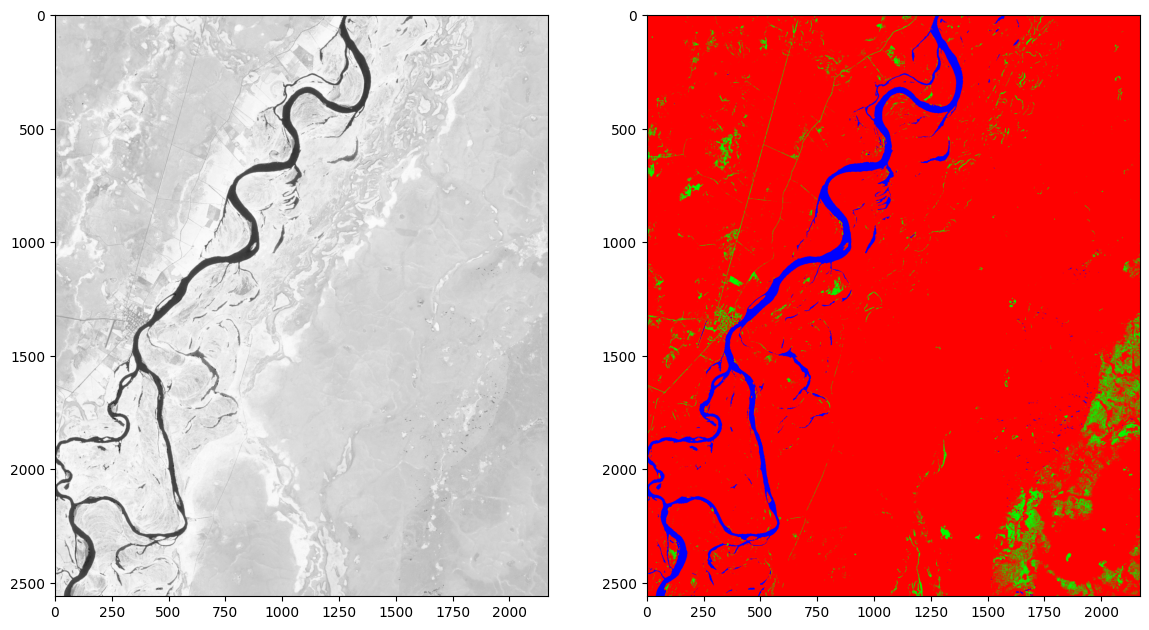

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14, 14))
ax1.imshow(ndvi, cmap='gray')
ax2.imshow(labeled_img, cmap='brg');

In [ ]:
#Calculo da Diferença entre Imagens

In [23]:
first_item = items[0]
second_item = items[10]

In [24]:
ndvi_first_image = read(first_item.assets['NDVI'].href, bbox=bbox)
ndvi_second_image = read(second_item.assets['NDVI'].href, bbox=bbox)

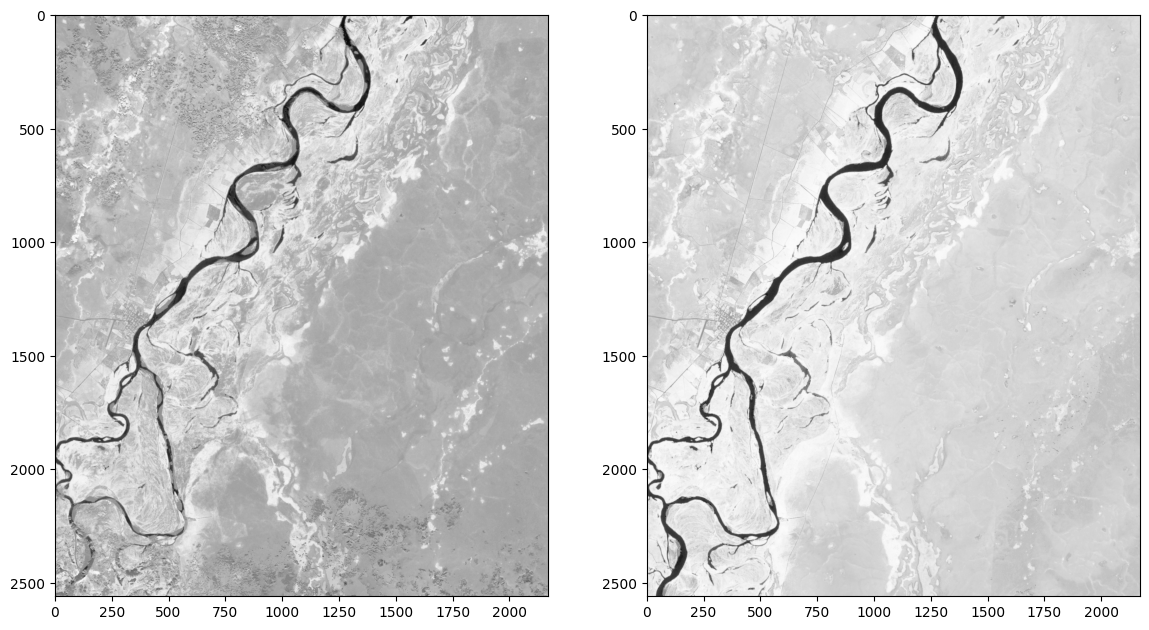

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 14))    #visualizar o resultado
ax1.imshow(ndvi_first_image, cmap='gray')
ax2.imshow(ndvi_second_image, cmap='gray')

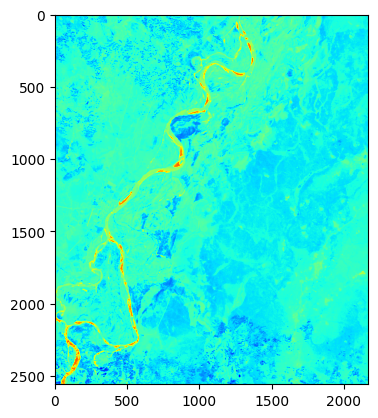

In [26]:
ndvi_diff = ndvi_first_image - ndvi_second_image
plt.imshow(ndvi_diff, cmap='jet');

#As can be seen in the the NDVI difference plot, the main changes on pixel values were found in agriculture areas, 
#which was expected due to changes in crops.

#The blue values indicate negative values, while red values are positive. 

#This means that for the blue areas there was a loss of vegetation, as a decreasing result on the NDVI value, 
#meaning that crops were harvest. Meanwhile, on the red areas, the NDVI value increased as a result of the more 
#vigorous vegetation on the recent date.

In [ ]:
#As can be seen in the the NDVI difference plot, the main changes on pixel values were found in agriculture areas, 
#which was expected due to changes in crops.

#The blue values indicate negative values, while red values are positive. This means that for the blue areas there 
#was a loss of vegetation, as a decreasing result on the NDVI value, meaning that crops were harvest. Meanwhile, 
#on the red areas, the NDVI value increased as a result of the more vigorous vegetation on the recent date.